IMPORTING LIBRARIES

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

READING DATASET

In [6]:
df = pd.read_excel('MONTHLY.xlsx')

CORRELATION MATRIX

In [7]:
correlation_matrix = df.drop(['MONTH '],1).corr()

C:\Users\sudha\AppData\Local\Temp\ipykernel_13300\6975348.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  correlation_matrix = df.drop(['MONTH '],1).corr()


COLUMNS

In [8]:
df.columns

Index(['MONTH ', 'GDP GROWTH', 'UNEMPLOYMENT RATE', 'INFLATION RATE',
       'MORTGAGE INTEREST RATES', 'HOUSING STARTS', 'EXISTING HOME SALES',
       'CONSUMER CONFIDENCE INDEX', 'HOUSING CREDIT AVAILABILITY INDEX',
       'INTEREST RATE POLICY RATE', 'HOME PRICE INDEX'],
      dtype='object')

CORRELATION MATRIX PLOT

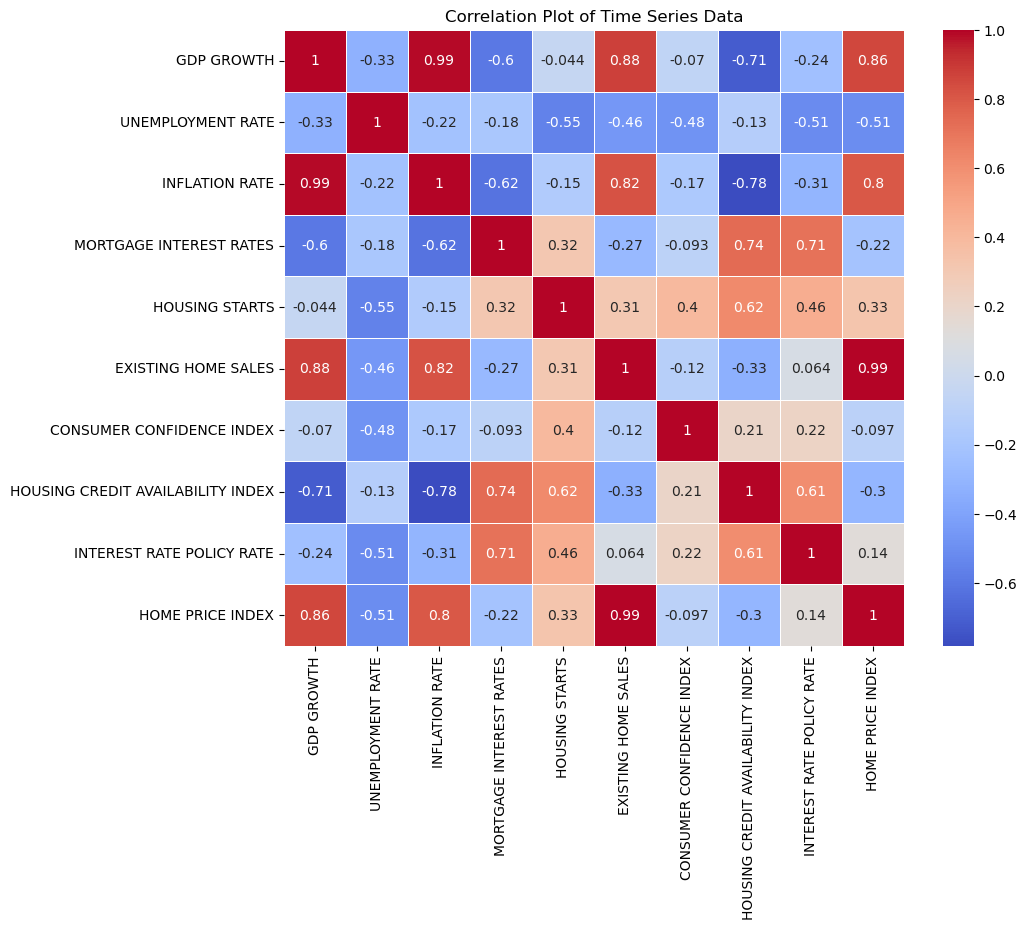

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot of Time Series Data')
plt.show()

We could see GDP GROWTH, INFLATION RATE, EXISTING HOME SALES are positively impacting HOME PRICE INDEX, so basically when these atrribute increase then HOME PRICE INDEX also increases

On the other hand UNEMPLOYMENT RATE, MORTGAGE INTEREST RATES, CONSUMER CONFIDENCE INDEX AND HOUSING CREDIT AVAILABILITY INDEX are negatively impacting HOME PRICE INDEX,so when these attributes increases then HOME PRICE INDEX decreases

HOUSING STARTS and INTEREST RATE POLICY RATE doesn't influence HOME PRICE INDEX

DETAILED ANALYSIS OF THESE CORRELATION

In [10]:
# POSITIVE IMPACT

REGRESSION PLOT - GDP GROWTH VS HOME PRICE INDEX

<AxesSubplot:xlabel='GDP GROWTH', ylabel='HOME PRICE INDEX'>

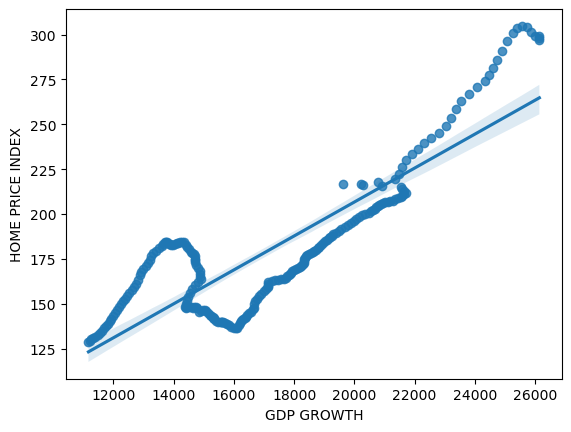

In [11]:
sns.regplot(x=df['GDP GROWTH'],y=df['HOME PRICE INDEX'])

REGRESSION PLOT - INFLATION RATE VS HOME PRICE INDEX

<AxesSubplot:xlabel='INFLATION RATE', ylabel='HOME PRICE INDEX'>

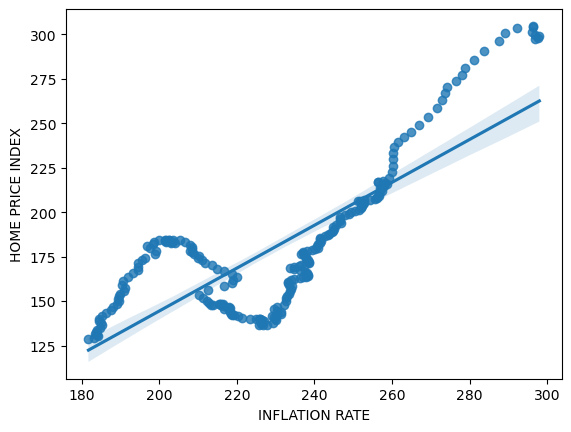

In [12]:
sns.regplot(x=df['INFLATION RATE'],y=df['HOME PRICE INDEX'])

REGRESSION PLOT - EXISTING HOME SALES VS HOME PRICE INDEX

<AxesSubplot:xlabel='EXISTING HOME SALES', ylabel='HOME PRICE INDEX'>

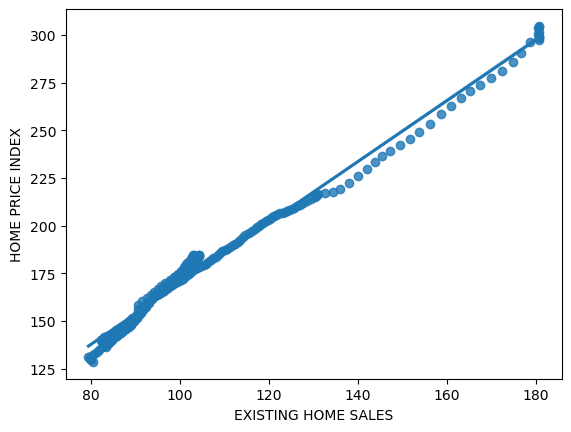

In [13]:
sns.regplot(x=df['EXISTING HOME SALES'],y=df['HOME PRICE INDEX'])

In [14]:
# NEGATIVE IMPACT

REGRESSION PLOT - UNEMPLOYMENT RATE VS HOME PRICE INDEX

<AxesSubplot:xlabel='UNEMPLOYMENT RATE', ylabel='HOME PRICE INDEX'>

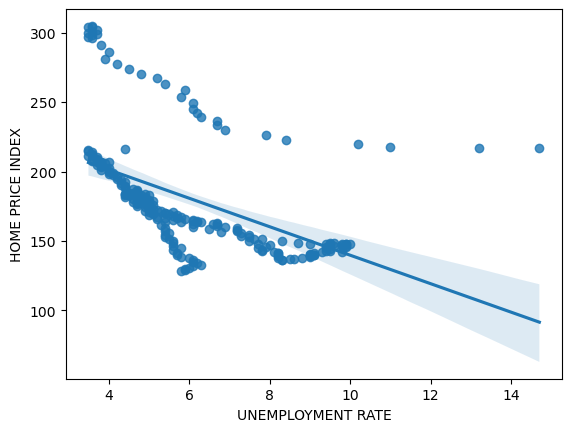

In [15]:
sns.regplot(x=df['UNEMPLOYMENT RATE'],y=df['HOME PRICE INDEX'])

REGRESSION PLOT - MORTGAGE INTEREST RATES VS HOME PRICE INDEX

<AxesSubplot:xlabel='MORTGAGE INTEREST RATES', ylabel='HOME PRICE INDEX'>

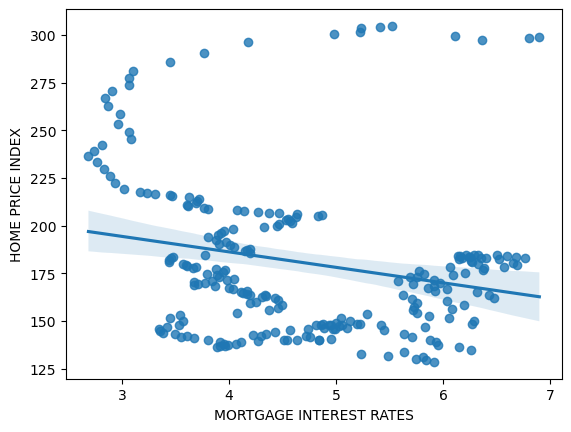

In [16]:
sns.regplot(x=df['MORTGAGE INTEREST RATES'],y=df['HOME PRICE INDEX'])

REGRESSION PLOT - CONSUMER CONFIDENCE INDEX VS HOME PRICE INDEX

<AxesSubplot:xlabel='CONSUMER CONFIDENCE INDEX', ylabel='HOME PRICE INDEX'>

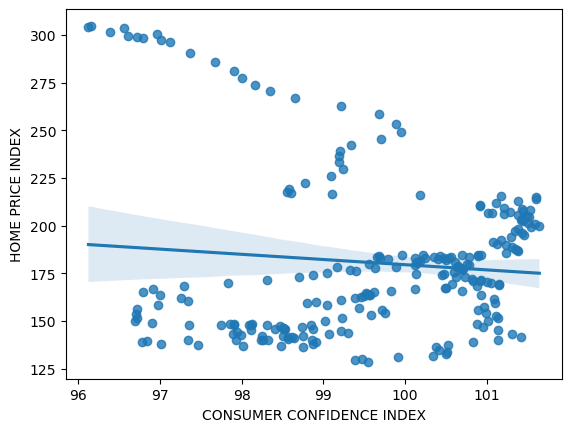

In [17]:
sns.regplot(x=df['CONSUMER CONFIDENCE INDEX'],y=df['HOME PRICE INDEX'])

As far as time series data is being concerned not all attributes or features in the dataset might always positively influence with present data alone.

It can also influence with past data as well.

So lets try to check the correlations for 40 lags and see in which lag we are observing a positive influence of consumer confidence index upon home price index

PAST LAGS CORRELATION CHECK WITH HOME PRICE INDEX

In [18]:
import pandas as pd



column_name_A = 'CONSUMER CONFIDENCE INDEX'
column_name_B = 'HOME PRICE INDEX'

max_lag = 50

lagged_correlations = pd.DataFrame(columns=['Lag', 'Correlation'])

for lag in range(1, max_lag + 1):
    shifted_A = df[column_name_A].shift(lag)
    
    correlation = shifted_A.corr(df[column_name_B])
    
    lagged_correlations = lagged_correlations.append({'Lag': lag, 'Correlation': correlation}, ignore_index=True)

print(lagged_correlations)

     Lag  Correlation
0    1.0    -0.067422
1    2.0    -0.035531
2    3.0    -0.002772
3    4.0     0.031346
4    5.0     0.068183
5    6.0     0.108740
6    7.0     0.150632
7    8.0     0.189979
8    9.0     0.226228
9   10.0     0.261245
10  11.0     0.293747
11  12.0     0.322625
12  13.0     0.348632
13  14.0     0.373426
14  15.0     0.396600
15  16.0     0.418010
16  17.0     0.436532
17  18.0     0.449555
18  19.0     0.458220
19  20.0     0.465017
20  21.0     0.471477
21  22.0     0.480605
22  23.0     0.493940
23  24.0     0.509632
24  25.0     0.526341
25  26.0     0.543684
26  27.0     0.560668
27  28.0     0.578696
28  29.0     0.599189
29  30.0     0.621109
30  31.0     0.642639
31  32.0     0.663168
32  33.0     0.677804
33  34.0     0.681514
34  35.0     0.676793
35  36.0     0.668481
36  37.0     0.659353
37  38.0     0.651027
38  39.0     0.644027
39  40.0     0.638061
40  41.0     0.631717
41  42.0     0.622770
42  43.0     0.611545
43  44.0     0.598808
44  45.0  

C:\Users\sudha\AppData\Local\Temp\ipykernel_13300\2614131599.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lagged_correlations = lagged_correlations.append({'Lag': lag, 'Correlation': correlation}, ignore_index=True)
C:\Users\sudha\AppData\Local\Temp\ipykernel_13300\2614131599.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lagged_correlations = lagged_correlations.append({'Lag': lag, 'Correlation': correlation}, ignore_index=True)
C:\Users\sudha\AppData\Local\Temp\ipykernel_13300\2614131599.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lagged_correlations = lagged_correlations.append({'Lag': lag, 'Correlation': correlation}, ignore_index=True)
C:\Users\sudha\AppData\Local\Temp\ipykernel_13300\2614131599.

Here we could see at 34th time lag of consumer confidence index we are seeing a positive influence, lets confirm it much deeper

CREATING ANOTHER COLUMN WITH 34th LAG

In [19]:
column_name = 'CONSUMER CONFIDENCE INDEX'

df['LAG_1_' + column_name] = df[column_name].shift(34)

REGRESSION PLOT - 34th LAG CONSUMER CONFIDENCE INDEX VS HOME PRICE INDEX

<AxesSubplot:xlabel='LAG_1_CONSUMER CONFIDENCE INDEX', ylabel='HOME PRICE INDEX'>

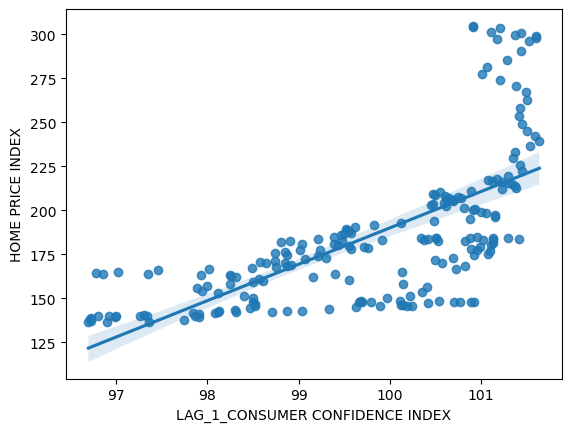

In [20]:
sns.regplot(x=df['LAG_1_' + column_name],y=df['HOME PRICE INDEX'])

We could consumer confidence index at 34 time lag is positively influencing home price index.

This can mean that Consumer Confidence surveys may have been conducted 34 month interval prior to House Sales, so a person would have appeared to a Consumer Confidence survey 40 months before purchasing a House or Home.

As Consumer Confidence Index is helping only with a 34 time lag, it will be difficult to use this data for forecasting as we cannot be able to determine in which time level the consumer confidence index will influence future home price index.

So its better to not consider Consumer Confidence Index as a feature for our dataset.

DROPPING CONSUMER CONFIDENCE INDEX

In [21]:
df = df.drop(['CONSUMER CONFIDENCE INDEX'],1)

df = df.drop(['LAG_1_CONSUMER CONFIDENCE INDEX'],1)

C:\Users\sudha\AppData\Local\Temp\ipykernel_13300\2902889705.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['CONSUMER CONFIDENCE INDEX'],1)
C:\Users\sudha\AppData\Local\Temp\ipykernel_13300\2902889705.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['LAG_1_CONSUMER CONFIDENCE INDEX'],1)


In [22]:
import statsmodels.api as sm

In [23]:
df

,MONTH,GDP GROWTH,UNEMPLOYMENT RATE,INFLATION RATE,MORTGAGE INTEREST RATES,HOUSING STARTS,EXISTING HOME SALES,HOUSING CREDIT AVAILABILITY INDEX,INTEREST RATE POLICY RATE,HOME PRICE INDEX
0,2003-01-01,11174.129000,5.8,181.700,5.9160,117.8,80.322599,17.230836,1.24,128.460
1,2003-02-01,11220.341333,5.9,183.100,5.8425,109.7,80.017143,17.108140,1.26,129.355
2,2003-03-01,11266.553667,5.9,184.200,5.7450,147.2,79.711686,16.985444,1.25,130.147
3,2003-04-01,11312.766000,6.0,183.800,5.8125,151.2,79.406230,16.862748,1.26,130.884
4,2003-05-01,11397.400333,6.1,183.500,5.4840,165.0,80.017143,16.890068,1.26,131.734
...,...,...,...,...,...,...,...,...,...,...
235,2022-08-01,25861.958000,3.7,296.171,5.2225,134.5,180.732602,2.796355,2.33,301.638
236,2022-09-01,25999.975000,3.5,296.808,6.1120,127.5,180.758057,2.942678,2.56,299.443
237,2022-10-01,26137.992000,3.7,298.012,6.9000,121.6,180.783512,3.089000,3.08,299.017
238,2022-11-01,26137.992000,3.6,297.711,6.8050,111.1,180.783512,3.089000,3.78,298.232


PERFORMING SEASONAL DECOMPOSITION AND PLOTTING TREND, SEASONALITY AND SHORT TERM FLUCTUATIONS

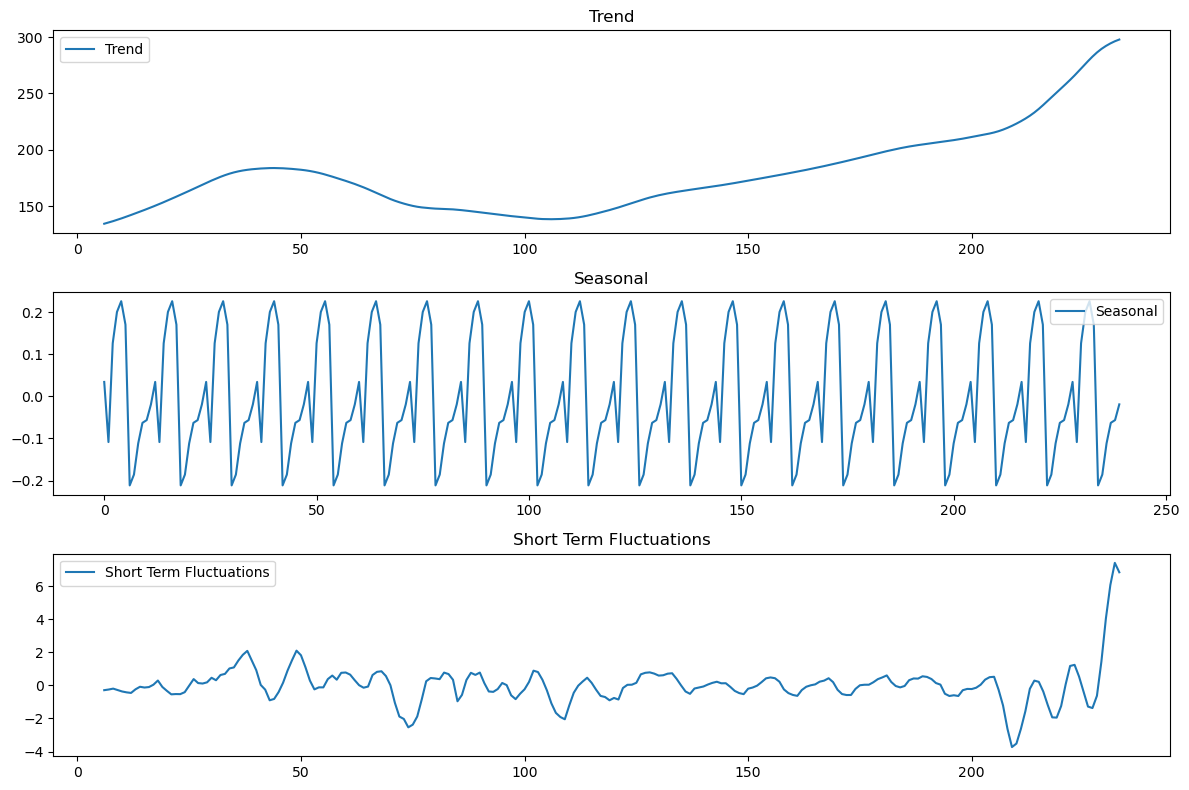

In [24]:
res = sm.tsa.seasonal_decompose(df['HOME PRICE INDEX'],period=12)

trend = res.trend
seasonal = res.seasonal
residual = res.resid

fig, axes = plt.subplots(3, 1, figsize=(12, 8))

axes[0].plot(trend.index, trend, label='Trend')
axes[0].set_title('Trend')
axes[0].legend()

axes[1].plot(seasonal.index, seasonal, label='Seasonal')
axes[1].set_title('Seasonal')
axes[1].legend()

axes[2].plot(residual.index, residual, label='Short Term Fluctuations')
axes[2].set_title('Short Term Fluctuations')
axes[2].legend()

plt.tight_layout()
plt.show()

TREND:

1. We could see a slight increase from 2004 and a flatness from 2005 to 2008.
2. From 2009 to 2013 there is flatness in lower level and rise from 2014
3. After 2014 we could see significant rise continously

SEASONALITY:
    
The data doesn't show any changes in behaviour or trend on a seasonal level and its pretty much constant.

SHORT TERM FLUCTUATIONS:

We could see many small high low dip fluctuations and 2022 we could see significant increase level 

In [25]:
df.columns

Index(['MONTH ', 'GDP GROWTH', 'UNEMPLOYMENT RATE', 'INFLATION RATE',
       'MORTGAGE INTEREST RATES', 'HOUSING STARTS', 'EXISTING HOME SALES',
       'HOUSING CREDIT AVAILABILITY INDEX', 'INTEREST RATE POLICY RATE',
       'HOME PRICE INDEX'],
      dtype='object')

In [239]:
df_model = df.copy()

In [240]:
df_model.head()

,MONTH,GDP GROWTH,UNEMPLOYMENT RATE,INFLATION RATE,MORTGAGE INTEREST RATES,HOUSING STARTS,EXISTING HOME SALES,HOUSING CREDIT AVAILABILITY INDEX,INTEREST RATE POLICY RATE,HOME PRICE INDEX
0,2003-01-01,11174.129000,5.8,181.7,5.9160,117.8,80.322599,17.230836,1.24,128.460
1,2003-02-01,11220.341333,5.9,183.1,5.8425,109.7,80.017143,17.108140,1.26,129.355
2,2003-03-01,11266.553667,5.9,184.2,5.7450,147.2,79.711686,16.985444,1.25,130.147
3,2003-04-01,11312.766000,6.0,183.8,5.8125,151.2,79.406230,16.862748,1.26,130.884
4,2003-05-01,11397.400333,6.1,183.5,5.4840,165.0,80.017143,16.890068,1.26,131.734


# MODEL BUILDING

RENAMING COLUMN NAMES FOR FBPROPHET MODEL

In [241]:
df_model = df_model.rename(columns={'MONTH ':'ds','HOME PRICE INDEX':'y'})

In [242]:
df_model

,ds,GDP GROWTH,UNEMPLOYMENT RATE,INFLATION RATE,MORTGAGE INTEREST RATES,HOUSING STARTS,EXISTING HOME SALES,HOUSING CREDIT AVAILABILITY INDEX,INTEREST RATE POLICY RATE,y
0,2003-01-01,11174.129000,5.8,181.700,5.9160,117.8,80.322599,17.230836,1.24,128.460
1,2003-02-01,11220.341333,5.9,183.100,5.8425,109.7,80.017143,17.108140,1.26,129.355
2,2003-03-01,11266.553667,5.9,184.200,5.7450,147.2,79.711686,16.985444,1.25,130.147
3,2003-04-01,11312.766000,6.0,183.800,5.8125,151.2,79.406230,16.862748,1.26,130.884
4,2003-05-01,11397.400333,6.1,183.500,5.4840,165.0,80.017143,16.890068,1.26,131.734
...,...,...,...,...,...,...,...,...,...,...
235,2022-08-01,25861.958000,3.7,296.171,5.2225,134.5,180.732602,2.796355,2.33,301.638
236,2022-09-01,25999.975000,3.5,296.808,6.1120,127.5,180.758057,2.942678,2.56,299.443
237,2022-10-01,26137.992000,3.7,298.012,6.9000,121.6,180.783512,3.089000,3.08,299.017
238,2022-11-01,26137.992000,3.6,297.711,6.8050,111.1,180.783512,3.089000,3.78,298.232


TRAIN AND TEST DATA

In [243]:
train_data = df_model[df_model['ds'] <= '2021-12-01']
test_data = df_model[(df_model['ds'] >= '2022-01-01') & (df_model['ds'] <= '2022-12-01')]

In [244]:
train_data.head()

,ds,GDP GROWTH,UNEMPLOYMENT RATE,INFLATION RATE,MORTGAGE INTEREST RATES,HOUSING STARTS,EXISTING HOME SALES,HOUSING CREDIT AVAILABILITY INDEX,INTEREST RATE POLICY RATE,y
0,2003-01-01,11174.129000,5.8,181.7,5.9160,117.8,80.322599,17.230836,1.24,128.460
1,2003-02-01,11220.341333,5.9,183.1,5.8425,109.7,80.017143,17.108140,1.26,129.355
2,2003-03-01,11266.553667,5.9,184.2,5.7450,147.2,79.711686,16.985444,1.25,130.147
3,2003-04-01,11312.766000,6.0,183.8,5.8125,151.2,79.406230,16.862748,1.26,130.884
4,2003-05-01,11397.400333,6.1,183.5,5.4840,165.0,80.017143,16.890068,1.26,131.734


In [245]:
test_data.head()

,ds,GDP GROWTH,UNEMPLOYMENT RATE,INFLATION RATE,MORTGAGE INTEREST RATES,HOUSING STARTS,EXISTING HOME SALES,HOUSING CREDIT AVAILABILITY INDEX,INTEREST RATE POLICY RATE,y
228,2022-01-01,24740.480000,4.0,281.148,3.4450,121.0,174.774122,2.851160,0.08,285.708
229,2022-02-01,24909.812000,3.8,283.716,3.7625,126.1,176.675433,2.773929,0.08,290.795
230,2022-03-01,25079.144000,3.6,287.504,4.1720,142.6,178.576744,2.696699,0.20,296.271
231,2022-04-01,25248.476000,3.6,289.109,4.9825,164.3,180.478055,2.619468,0.33,300.625
232,2022-05-01,25406.964333,3.6,292.296,5.2300,140.6,180.554419,2.629656,0.77,303.904


TRAINING AND VALIDATING FBPROPHET MODEL

In [246]:
from prophet import Prophet

C:\Users\sgowrisankar\AppData\Local\Temp\ipykernel_14912\2811985341.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  for i in train_data.drop(['y','ds'],1):
22:23:51 - cmdstanpy - INFO - Chain [1] start processing
22:23:51 - cmdstanpy - INFO - Chain [1] done processing


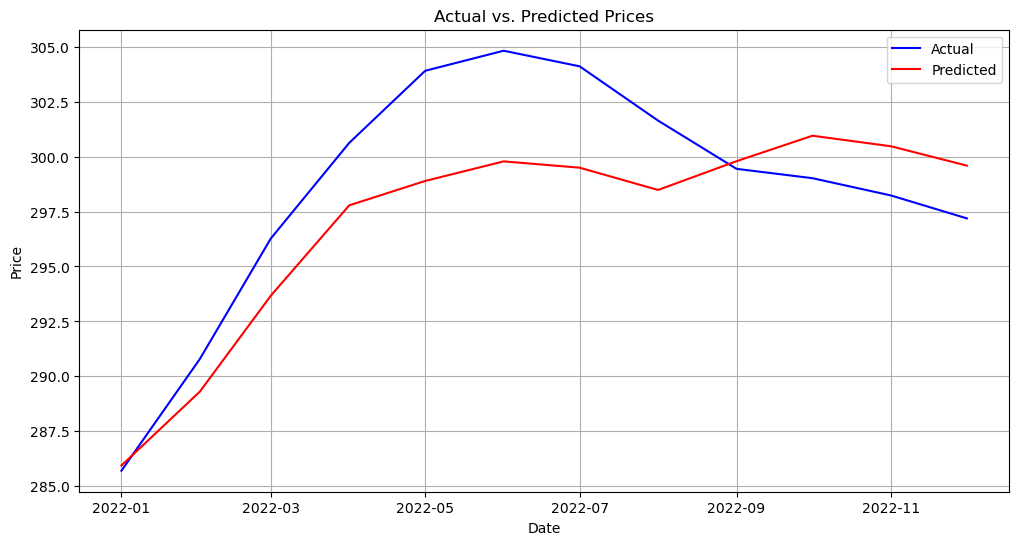

In [254]:
model = Prophet(growth='linear',)
for i in train_data.drop(['y','ds'],1):
    model.add_regressor(i,mode='multiplicative')

model.fit(train_data)

future = test_data

forecast = model.predict(future)

plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'],actual,label='Actual', color='b')
plt.plot(test_data['ds'], forecast['yhat'], label='Predicted', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

R2 SCORE AND MAE SCORE

In [255]:
from sklearn import metrics

In [256]:
metrics.r2_score(actual,forecast['yhat'])

0.6719489563230197

In [257]:
metrics.mean_absolute_error(actual,forecast['yhat'])

2.658352165569402

FB MODEL COEFFICIENTS

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet.utilities import regressor_coefficients

regressor_coef = regressor_coefficients(model)

regressor_coef = regressor_coef.sort_values('center',ascending=False)

In [264]:
regressor_coef = regressor_coef[['regressor','regressor_mode','center']]

FEATURE IMPORTANCE PLOT FOR FBPROPHET MODEL

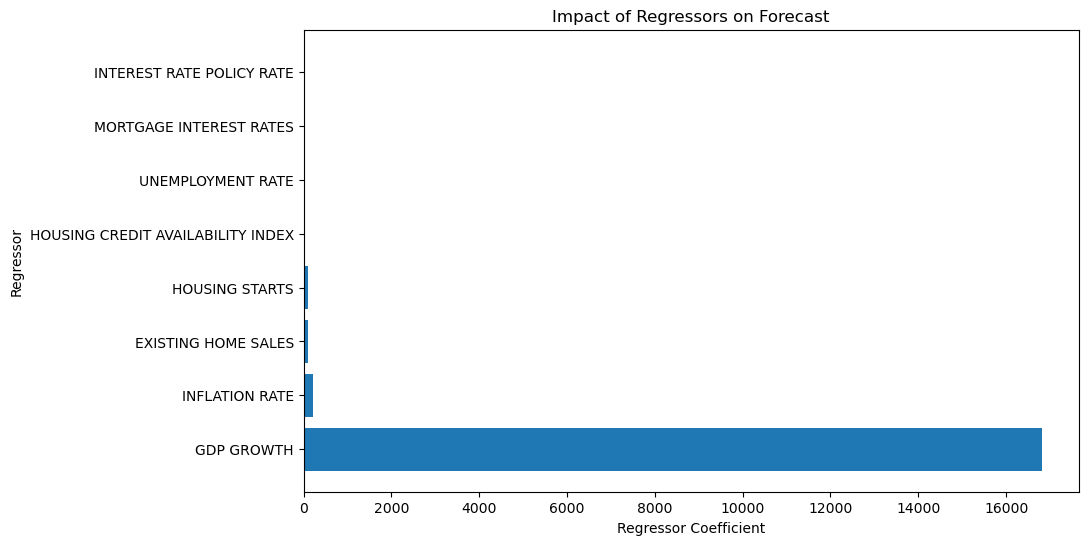

In [265]:
plt.figure(figsize=(10, 6))
plt.barh(regressor_coef['regressor'], regressor_coef['center'])
plt.xlabel('Regressor Coefficient')
plt.ylabel('Regressor')
plt.title('Impact of Regressors on Forecast')
plt.show() 

We could see that GDP GROWTH, INFLATION RATE,EXISTING HOME SALES and HOUSING STARTS are influencing the model pretty much